In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
directory = '../../../../Data/School/0001/'
file_name_label = '0001_tei label.txt'

file_label = os.path.join(directory, file_name_label)


Bad key "text.kerning_factor" on line 4 in
/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file_name_data = '0001_tei.dat'

file_data = os.path.join(directory, file_name_data)
df = pd.read_csv(file_data, sep = '\t', error_bad_lines = False)

In [3]:
df

,gakkou,seibetu,q1.1,q1.2,q2,q4,q6,q7
0,101,1,9,1,10,1,,2
1,101,1,9,1,10,1,,1
2,101,1,9,4,4,2,1,2
3,101,1,9,1,5,1,1,2
4,101,1,9,2,14,1,,1
...,...,...,...,...,...,...,...,...
16559,1312,2,9,2,1,1,,2
16560,1312,2,9,3,1,1,1,2
16561,1312,2,9,4,1,1,,1
16562,1312,2,9,4,1,1,1,2


In [4]:
abbrevaiton = {
    'GNDR': 'gender',
    'M':'male',
    'F':'female',
    'GDN':'guardian',
    'AFF':'Agriculture Forestry and Fishing',
    'MFG':'Manufacturing',
    'SRV':'Service',
    'ORS':'Others',
    'WC':'White Collar',
    'UE':'Unemployed',
    'UNK':'Unknown',
    'RSN':'reason',
    'SZ':'size',
    'FB':'family business',
}

In [5]:
gndr = {
    1:'M',
    2:'F'
}

In [6]:
gdn_occ = {
    1:'AFF',
    2:'AFF',
    3:'AFF',
    4:'MFG',
    5:'MFG',
    6:'SRV',
    7:'SRV',
    8:'SRV',
    9:'SRV',
    10:'WC',
    11:'ORS',
    12:'ORS',
    13:'ORS',
    14:'UE',
    15:'UK',
    99:'UNK',
}

In [7]:
heir = {
    1:'Y',
    2:'N',
    9:'UNK'
}

In [8]:
gdn_rel = {
    1: 'Eldest son / daughter',
    2: 'Second son / daughter',
    3: 'Third son / daughter',
    4: 'Fourth or more',
    5: 'Brother / Sister',
    6: 'Nephew Niece',
    7: 'UNK'
}

In [9]:
def apply_dict(col, dictionary, df = df):
    df[col] = df[col].map(dictionary)

In [10]:
col_dict = [['seibetu', gndr],
            ['q1.1', heir],
            ['q1.2', gdn_rel],
            ['q2', gdn_occ],
           ]

In [11]:
for item in col_dict:
    col = item[0]
    dictionary = item[1]
    apply_dict(col, dictionary)

In [12]:
df

,gakkou,seibetu,q1.1,q1.2,q2,q4,q6,q7
0,101,M,UNK,Eldest son / daughter,WC,1,,2
1,101,M,UNK,Eldest son / daughter,WC,1,,1
2,101,M,UNK,Fourth or more,MFG,2,1,2
3,101,M,UNK,Eldest son / daughter,MFG,1,1,2
4,101,M,UNK,Second son / daughter,UE,1,,1
...,...,...,...,...,...,...,...,...
16559,1312,F,UNK,Second son / daughter,AFF,1,,2
16560,1312,F,UNK,Third son / daughter,AFF,1,1,2
16561,1312,F,UNK,Fourth or more,AFF,1,,1
16562,1312,F,UNK,Fourth or more,AFF,1,1,2


In [13]:
col_names = {
    'seibetu' : 'gndr',
    'q1.1' : 'heir',
    'q1.2' : 'gdn_rel',
    'q2' : 'gdn_occ',
}

In [14]:
df.rename(columns = col_names, inplace=True)

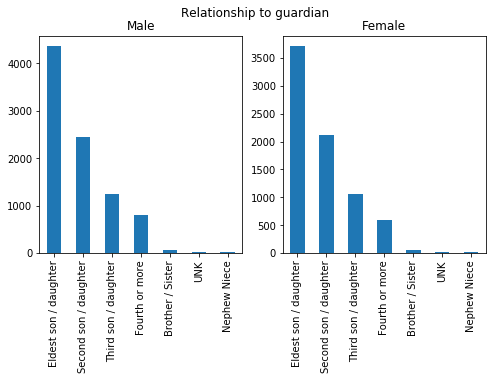

In [23]:
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
df[df.gndr == 'M'].gdn_rel.value_counts().plot(kind = 'bar', ax =axs2[0])
df[df.gndr == 'F'].gdn_rel.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Relationship to guardian')
plt.show()

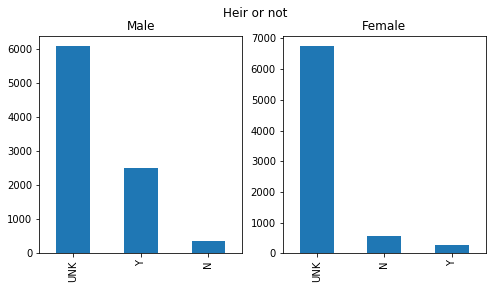

In [22]:
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
df[df.gndr == 'M'].heir.value_counts().plot(kind = 'bar', ax =axs2[0])
df[df.gndr == 'F'].heir.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Heir or not')
plt.show()

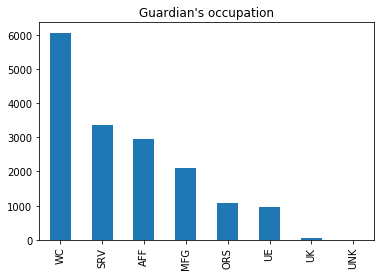

In [24]:
ax = df.gdn_occ.value_counts().plot(kind = 'bar')
ax.title.set_text("Guardian's occupation")